In [56]:
import os
import random

import matplotlib.pyplot as plt
import pandas as pd
import torch

from src.data.loss_dataset import LossDataset
import numpy as np

In [96]:
def get_loss_dataset(dataset_path: str) -> pd.DataFrame:
    dataset = LossDataset(dataset_path)
    dataset.load()

    df = dataset.df
    return df


def get_indices_from_probe_suite(suite: list) -> list[int]:
    return [idx for _, idx in suite]

In [97]:
dataset_name = "cifar100"

probe_suite = torch.load(f"../../data/processed/{dataset_name}/train_probe_suite.pt")
df = get_loss_dataset("../../models/losses/cifar100-1x-gpua100-20230315_1905")
df["epoch"] = df["epoch"].astype(int)

suite_names = {
    "typical": "Typical",
    "atypical": "Atypical",
    "random_outputs": "Random outputs",
    # "random_inputs_outputs": "Random inputs and outputs",
    "corrupted": "Corrupted",
}

random_outputs = probe_suite.random_outputs
random_outputs_indices = [idx for _, idx in random_outputs]
df2 = df[df['sample_index'].isin(random_outputs_indices)]
df2.head()

,batch_idx,loss,sample_index,y,y_hat,epoch
177,1,4.363281,46161,8,50,0
236,1,5.593750,37840,45,41,0
365,2,4.230469,22755,51,89,0
645,5,38.281250,27093,22,78,0
646,5,7.871094,4599,81,78,0


0

In [59]:
preds = []
epochs = sorted(df2['epoch'].unique())

for epoch in epochs:
    temp = df2.groupby("epoch").get_group(epoch)

# Make new column with True if y == y_hat
    temp['pred'] = np.where(temp['y'] == temp['y_hat'], 1, 0)
    preds.append(temp['pred'].mean())

/var/folders/zb/r3t36n8x4yxdbb4wy91dghwc0000gn/T/ipykernel_28936/2868142940.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['pred'] = np.where(temp['y'] == temp['y_hat'], 1, 0)
/var/folders/zb/r3t36n8x4yxdbb4wy91dghwc0000gn/T/ipykernel_28936/2868142940.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['pred'] = np.where(temp['y'] == temp['y_hat'], 1, 0)
/var/folders/zb/r3t36n8x4yxdbb4wy91dghwc0000gn/T/ipykernel_28936/2868142940.py:8: SettingWithCopyWarning: 
A value is trying to be set on a 

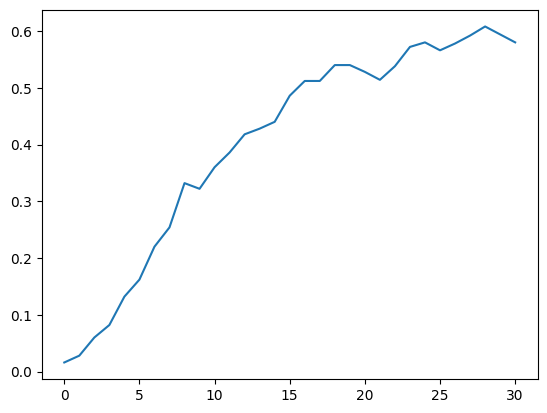

In [60]:
plt.plot(epochs, preds)
plt.show()

In [61]:

#epochs = sorted(df2['epoch'].unique())

temp = df2.groupby("epoch").get_group(20)

# Make new column with True if y == y_hat
temp['pred'] = np.where(temp['y'] == temp['y_hat'], 1, 0)
temp['pred'].mean()
temp

/var/folders/zb/r3t36n8x4yxdbb4wy91dghwc0000gn/T/ipykernel_28936/2726312417.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['pred'] = np.where(temp['y'] == temp['y_hat'], 1, 0)


,batch_idx,loss,sample_index,y,y_hat,epoch,pred
650164,1,4.226562,32953,64,3,20,0
650286,2,4.355469,12373,83,45,20,0
650345,2,0.683594,33135,31,31,20,1
650450,3,0.032990,45654,85,85,20,1
650517,4,4.667969,11528,74,24,20,0
...,...,...,...,...,...,...,...
699487,386,1.216797,45815,2,2,20,1
699545,387,0.477539,47726,86,86,20,1
699781,388,1.181641,18208,98,98,20,1
699816,389,1.497070,31863,84,85,20,0


sweet peppers


Text(0.5, 1.0, 'Random Output w. label sweet peppers')

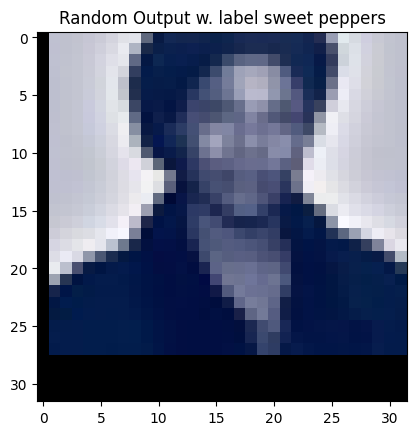

In [68]:
# plot some images
from src.data.idx_to_label_names import get_idx_to_label_names

idx_to_label = get_idx_to_label_names(dataset_name)

testid = 18208
# Plot the image
plt.imshow(probe_suite[testid][0][0].permute(1,2,0))
# Title
label = idx_to_label[probe_suite[testid][0][1]]
print(label)
plt.title(f"Random Output w. label {label}")


    

In [71]:
train = torch.load("../../data/processed/cifar100/train.pt")
# get correct labels from random outputs
correct_labels = [train[idx][1] for idx in random_outputs_indices]
# get incorrect labels from random outputs
random_labels = [probe_suite[idx][0][1] for idx in random_outputs_indices]

print(correct_labels[:10])
print(random_labels[:10])

[95, 66, 8, 72, 48, 33, 40, 89, 53, 9]
[38, 77, 88, 46, 85, 87, 42, 13, 0, 80]


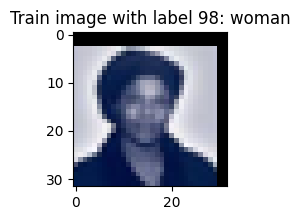

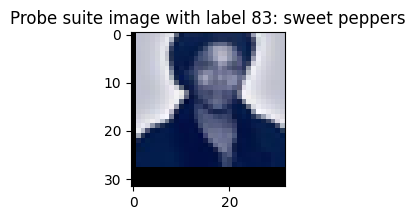

In [72]:
first_idx = 18208

# plot from train and probe suite
plt.figure(figsize=(2,2))
plt.imshow(train[first_idx][0].permute(1,2,0))
plt.title(f"Train image with label {train[first_idx][1]}: {idx_to_label[train[first_idx][1]]}")
plt.show()

plt.figure(figsize=(2,2))
plt.imshow(probe_suite[first_idx][0][0].permute(1,2,0))
plt.title(f"Probe suite image with label {probe_suite[first_idx][0][1]}: {idx_to_label[probe_suite[first_idx][0][1]]}")
plt.show()

In [73]:
# import datamodules
from src.data.datamodules import CIFAR10DataModule, CIFAR100DataModule
module = CIFAR100DataModule()
module.data_dir = "../../data/processed/cifar100"
module.setup("ost")

# get train and test dataloaders
train_loader = module.train_dataloader()
test_loader = module.test_dataloader()


In [76]:
train_loader.generator = iter(train_loader)


In [95]:
print(train_loader.dataset[18208][0][1])
print(train[18208][1])


83
98
